# Import Libraries

In [37]:
import pandas as pd
import seaborn as sns
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from plots import Plots as plot
import matplotlib.pyplot as plt
import numpy as np
from geopy import distance


# Load Dataset

In [2]:
df=pd.read_csv('../data/df.csv') # total merged dataset
# df_accepted=pd.read_csv('../data/df_accepted.csv') # merged dataset without driver_action=='rejected'

# Explore Dataset

## General Overview

In [6]:
df.describe()

,order_id,driver_id,lat,lng,origin_lat,origin_lon,dest_lat,dest_lon,distance,duration,year,month,hour,isHoliday,driver_proximity
count,1.555718e+06,1.555718e+06,1.555718e+06,1.555718e+06,1.555718e+06,1.555718e+06,1.555718e+06,1.555718e+06,1.555718e+06,1.555718e+06,1.555718e+06,1.555718e+06,1.555718e+06,1.555718e+06,1.555718e+06
mean,4.191817e+05,2.341504e+05,6.536075e+00,3.378822e+00,6.535654e+00,3.380029e+00,6.536117e+00,3.383491e+00,8.489182e+03,3.705213e+03,2.021000e+03,6.999965e+00,1.356604e+01,1.284783e-01,1.821102e+03
std,1.444435e+04,2.270439e+04,5.995268e-02,5.329471e-02,6.026214e-02,5.275148e-02,7.310955e-02,7.487250e-02,6.349889e+03,7.806279e+03,7.170815e-03,4.028703e-02,3.026006e+00,3.346217e-01,1.166246e+03
min,3.920010e+05,1.219810e+05,6.409333e+00,3.076561e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.647106e+01,1.600000e+01,2.021000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.067520e+05,2.429970e+05,6.498708e+00,3.348810e+00,6.499314e+00,3.350294e+00,6.465051e+00,3.342701e+00,4.008269e+03,1.722000e+03,2.021000e+03,7.000000e+00,1.100000e+01,0.000000e+00,1.108226e+03
50%,4.216870e+05,2.435890e+05,6.544250e+00,3.363503e+00,6.537572e+00,3.368576e+00,6.536838e+00,3.369805e+00,6.919488e+03,2.608000e+03,2.021000e+03,7.000000e+00,1.400000e+01,0.000000e+00,1.717132e+03
75%,4.293130e+05,2.440560e+05,6.593277e+00,3.385168e+00,6.591381e+00,3.387167e+00,6.596473e+00,3.406328e+00,1.131920e+04,3.922000e+03,2.021000e+03,7.000000e+00,1.600000e+01,0.000000e+00,2.435290e+03
max,5.179480e+05,2.478770e+05,7.702536e+00,8.515414e+00,8.226835e+00,8.522293e+00,7.703160e+00,8.607887e+00,6.828784e+05,2.234210e+06,2.022000e+03,9.000000e+00,2.300000e+01,1.000000e+00,6.590527e+05


In [7]:
df.nunique()

order_id             26458
driver_id             1213
driver_action            2
lat                 194265
lng                 170236
trip_start_time      25154
trip_end_time        25137
origin_lat           14548
origin_lon           14465
dest_lat             17480
dest_lon             17427
distance             25519
duration              7993
year                     2
month                    5
hour                    20
isHoliday                2
driver_proximity    688816
dtype: int64

## Distribution Plots

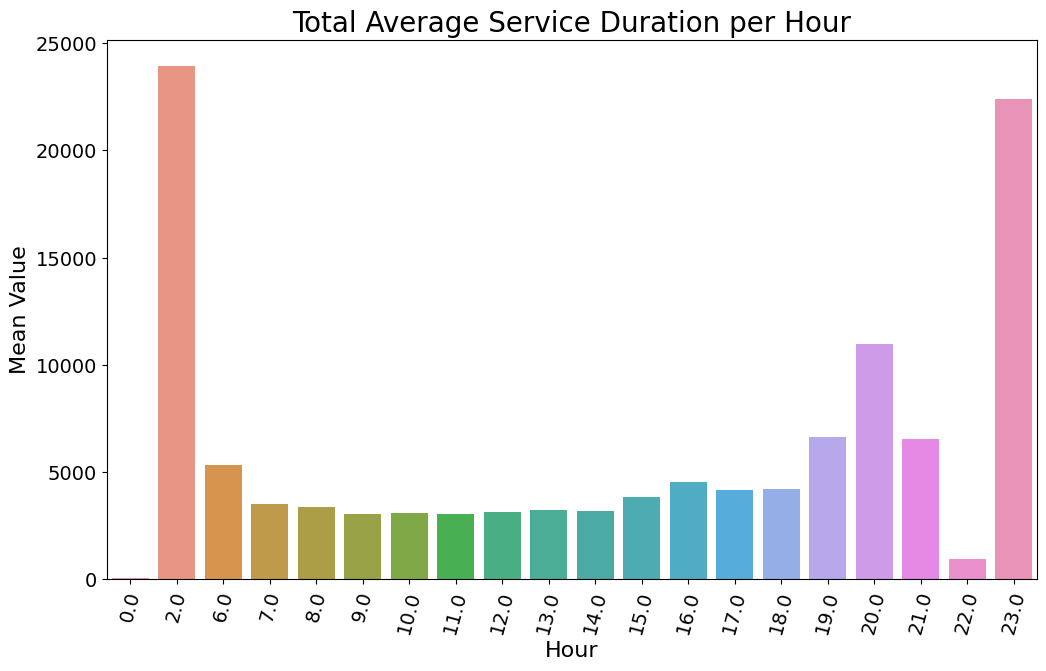

In [8]:
# # average duration per hour 
df_temp = pd.DataFrame(columns=['Hour','Mean Value'], data=np.transpose([df.groupby('hour').duration.mean().index,df.groupby('hour').duration.mean().values]))
plot.plot_bar(df_temp, 'Hour','Mean Value','Total Average Service Duration per Hour','Hour','Mean Value')


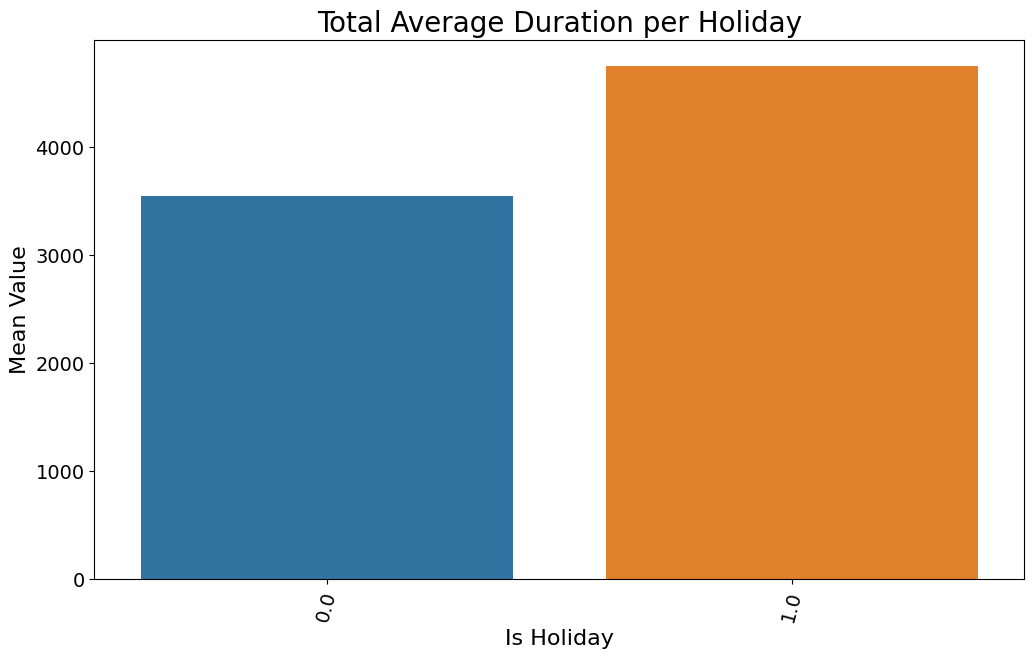

In [49]:
# we can see that when the day is a holiday the aggregated duration time increases on the whole dataset

df_temp = pd.DataFrame(columns=['Is Holiday','Duration Mean'], data=np.transpose([df.groupby('isHoliday').duration.mean().index,df.groupby('isHoliday').duration.mean().values]))
plot.plot_bar(df_temp, 'Is Holiday','Duration Mean','Total Average Duration per Holiday','Is Holiday','Mean Value')


In [153]:
import geopandas as gpd
import shapely
# df # your pandas dataframe with 10k records
# df_filt # your filtered dataframe



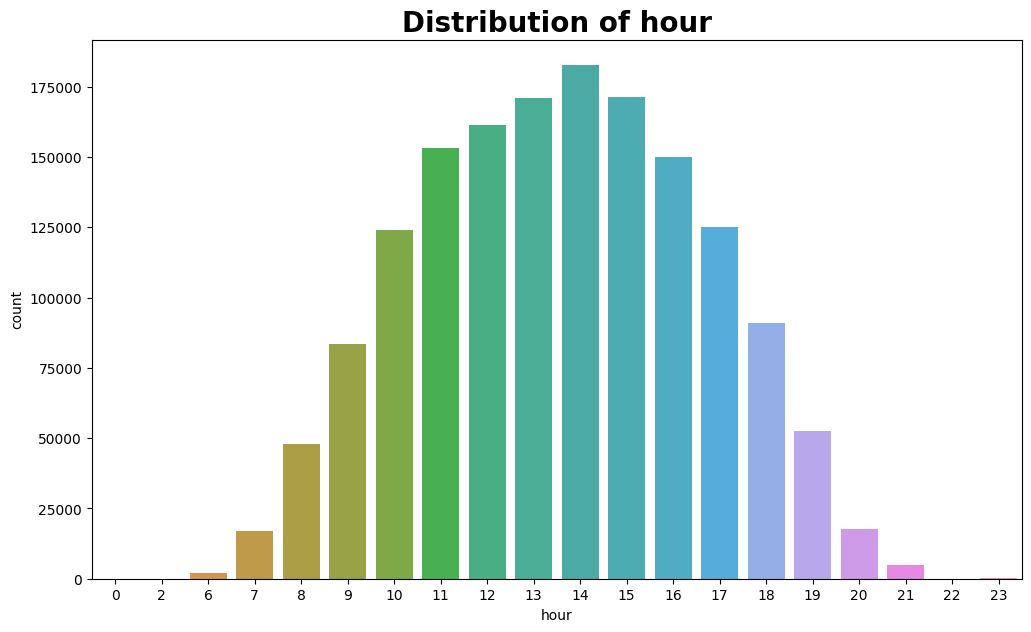

In [12]:
# hourly distribution plot
plot.plot_count(df=df,column='hour')

## Scatter Plots

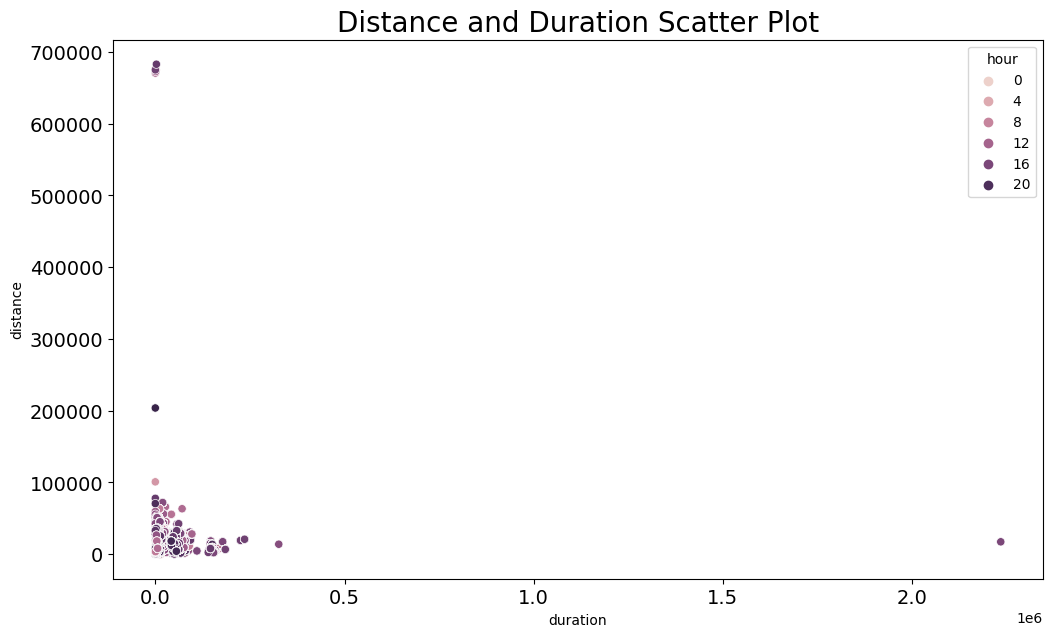

In [15]:
# scatter plot of distance and duration
plot.plot_scatter(df,'duration','distance','Distance and Duration Scatter Plot','hour',None)

## Service Per Week Day

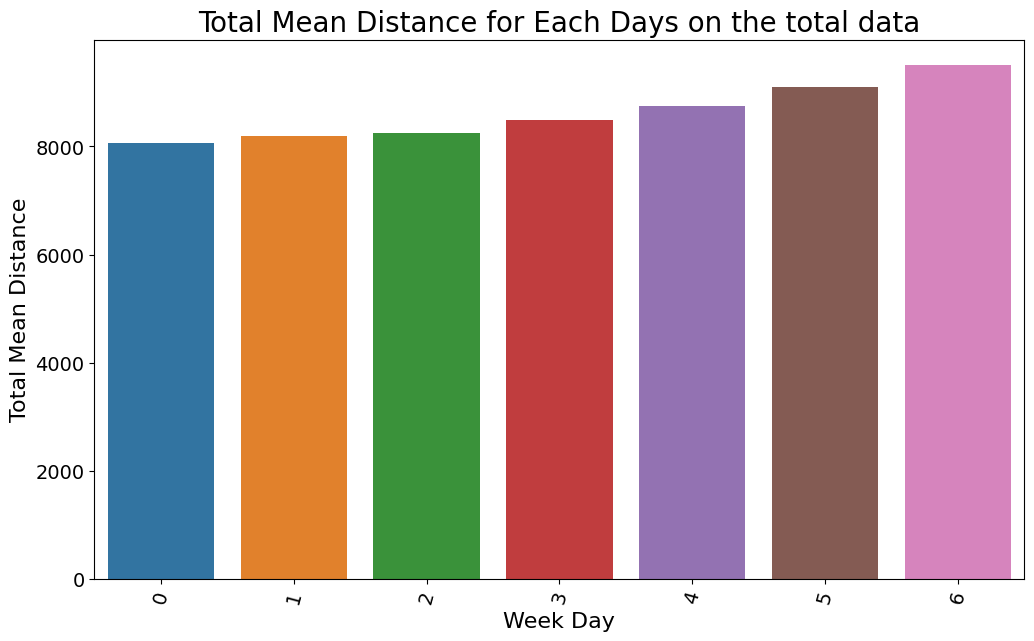

In [19]:
# service on a given day of the week
df['dayOfWeek'] = df.trip_start_time.dt.day_of_week
data_all = df.groupby(['dayOfWeek']).agg({'distance':'mean','duration':'mean'}).reset_index()
plot.plot_bar(data_all,'dayOfWeek','distance','Total Mean Distance for Each Days on the total data', xlabel='Week Day',ylabel='Total Mean Distance')

## Exploring the driver_action feature to find it's relation with maximum geocoordinate for allocation

In [20]:
df['driver_action'] = df.driver_action.map({'rejected':0,'accepted':1})


In [21]:
# driver exploration

driver_acceptance = df.groupby(['driver_id']).agg({'driver_action':'sum'}).reset_index()
driver_acceptance.sort_values(by=['driver_action'],ascending=False,inplace=True)


In [22]:
driver_acceptance.rename(columns={'driver_action':'driver_action_count'},inplace=True)

In [23]:
driver_acceptance

,driver_id,driver_action_count
418,243296,69
1119,245611,63
908,244107,60
180,227856,60
1156,245649,59
...,...,...
98,187244,0
687,243768,0
282,243010,0
187,228673,0


In [24]:
driver_acceptance.driver_action_count.value_counts()

0     61
17    41
26    38
24    38
23    37
      ..
60     2
55     1
59     1
63     1
69     1
Name: driver_action_count, Length: 62, dtype: int64

In [25]:
def map_acceptance(x):
    if x <10:
        return 'Min'
    elif x<30:
        return 'Medium'
    else:
        return 'Maximum'
driver_acceptance['acceptance_rate'] = driver_acceptance.driver_action_count.map(lambda x:map_acceptance(x))


In [26]:
df = df.merge(driver_acceptance,how='inner',on='driver_id')

In [27]:
data_all = df.groupby(['driver_action_count']).agg({'lat':'mean','lng':'mean'}).reset_index()


In [28]:
data_all

,driver_action_count,lat,lng
0,0,6.539703,3.368667
1,1,6.540517,3.374543
2,2,6.563759,3.354145
3,3,6.560682,3.359677
4,4,6.540538,3.371930
...,...,...,...
57,58,6.538205,3.367721
58,59,6.466253,3.458938
59,60,6.521175,3.406155
60,63,6.585939,3.356848


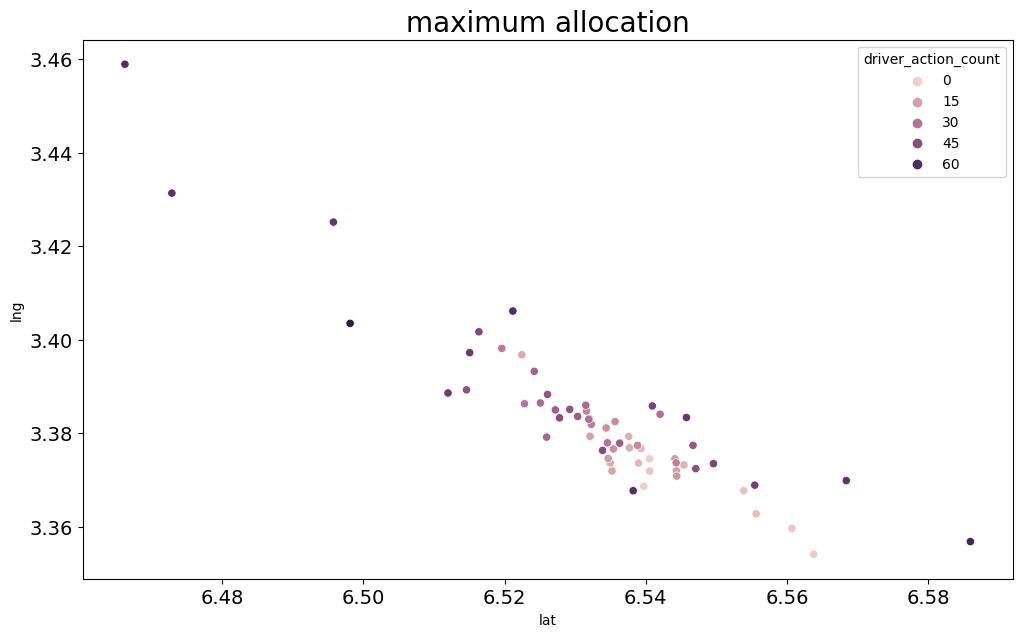

In [29]:
# scatter plot to detect maximum places for driver allocation
plot.plot_scatter(data_all,'lat','lng','maximum allocation','driver_action_count',None)


## Points inside maximum allocation centered radiuses

In [30]:
top_3_coordinates = df.groupby('acceptance_rate').agg({'lat':'mean','lng':'mean'}).reset_index()

In [31]:
top_3_coordinates

,acceptance_rate,lat,lng
0,Maximum,6.530892,3.384164
1,Medium,6.535335,3.379081
2,Min,6.546404,3.369758


In [58]:
def compute_inside(lat,lng, origin, radius=1):
    center = [{'lat':origin[0], 'lng': origin[1]}]
    test = [{'lat':lat,'lng':lng}]
    center_point_tuple = tuple(center[0].values()) 
    test_point_tuple = tuple(test[0].values())
    dis = distance.distance(center_point_tuple, test_point_tuple).km
    return dis
    # if dis <= radius:
    #     return True
    # else:
    #     return False
    

In [52]:
compute_inside(6.535335,  3.379081)

0.746642103562803

In [59]:
def compute_circle(lat,lng):
    max = [ 6.530892,  3.384164]
    medium = [ 6.535335,  3.379081]
    min = [ 6.546404,  3.369758]
    

    if compute_inside(lat,lng,max)<0.7:
        return 'max'
    elif compute_inside(lat,lng,medium)<1.0:
        return 'medium'
    else: 
        return 'min'

In [60]:
df['radius'] = df.apply(lambda row: compute_circle(row['lat'],row['lng']), axis=1)


In [78]:
df[df['driver_action']==0].radius.value_counts()

min       1498846
medium      20721
max         10280
Name: radius, dtype: int64

In [80]:
df.radius.value_counts()

min       1524385
medium      20884
max         10449
Name: radius, dtype: int64

## Correlation Plots

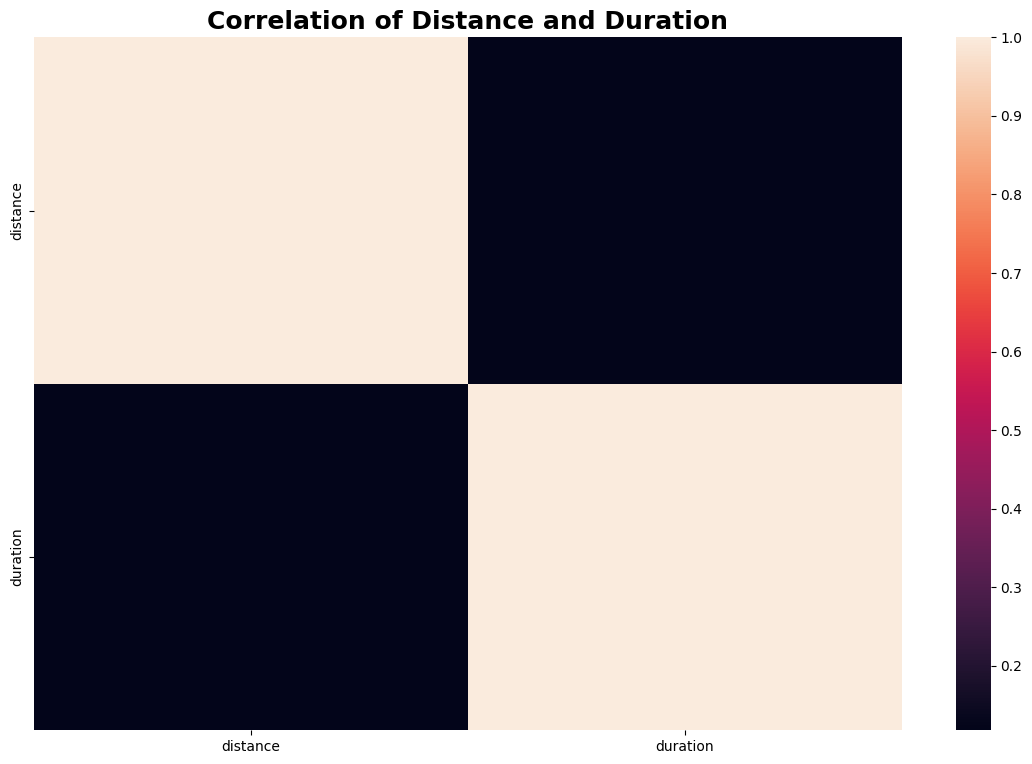

In [47]:
# Correlation plot for distance and duration
df_distance_duration_corr = df.loc[:,['distance','duration']]
df_distance_duration_corr_val = df_distance_duration_corr.corr()

plot.plot_heatmap_from_correlation(df_distance_duration_corr_val,title="Correlation of Distance and Duration")


In [65]:
# Correlation plot for distance and duration
df_driver_proximity_and_action_corr = df.loc[:,['driver_proximity','driver_action']]
df_driver_proximity_and_action_corr_val = df_driver_proximity_and_action_corr.corr()
df_driver_proximity_and_action_corr_val

,driver_proximity
driver_proximity,1.0


In [147]:
df.columns

Index(['order_id', 'driver_id', 'driver_action', 'lat', 'lng',
       'trip_start_time', 'trip_end_time', 'origin_lat', 'origin_lon',
       'dest_lat', 'dest_lon', 'distance', 'duration', 'year', 'month', 'hour',
       'isHoliday', 'driver_proximity', 'driver_action_count',
       'acceptance_rate'],
      dtype='object')

/home/owon/anaconda3/envs/issue/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


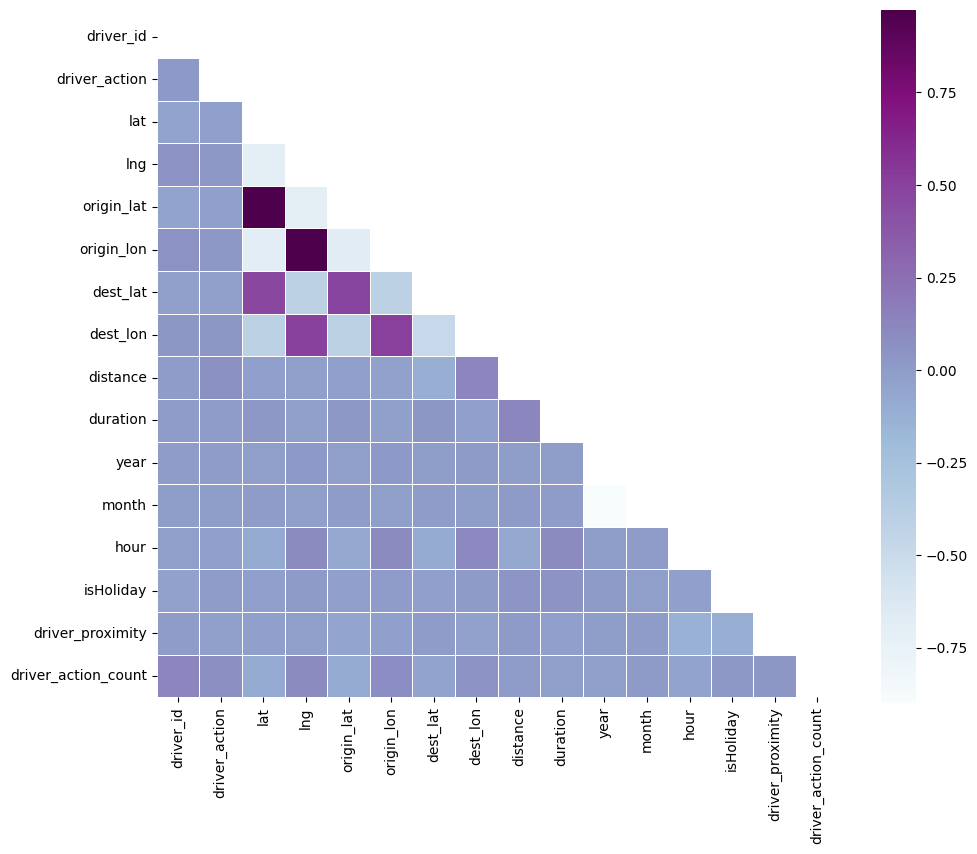

In [150]:
# Compute the general correlation matrix 
corr_all = df.drop(columns=['order_id','trip_start_time','trip_end_time'], axis = 1).corr()
# upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

## Summary

The dataset contains of
*  2 year (2022,2021) data
*  almost all hours service (only 4 hours - [1,3,4,5])
*  no work on sunday(?)
*  drivers who had gotten no job but was provided an offer.
  
Also
* By the end and beggining of the day @(23 and 02 hours) service duration shows a significant increase, which suggests that the traffic is crowded at that times. This is supported by the dataset distribution in hour column. 
* The Hour distribution shows a normal distribution, with maximum values at 14:00 hour, it suggests that, service users are high at that time and also normal traffic allows the service provider to deliver the requests.
* Service Duration shows an increase in the holidays
* Distance and Duration are not correlated - high duration - doesn't mean long distance
* The driver proximity has direct correlation with driver action(to be accepted or to be rejected), so it suggests that close drivers are selected for service upon the location of newly emerged request.
* Most of the service is given in short amount of time and little distance, so the scatter plot is concentrated for lower values
* our approximation for min, max and medium allocation seems to be working